# Bird‑phrase clustering – result exploration
Interactive notebook that reproduces the quick‑look analyses & plots we discussed.
Just run the cells top‑to‑bottom (or use **`Run All`**) — feel free to tweak paths or add new views.

In [20]:

import hashlib, textwrap
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# prettier, wider tables in notebooks
pd.set_option('display.max_columns', None)
plt.rcParams['figure.dpi'] = 110  # crisper on HiDPI
plt.rcParams['savefig.bbox'] = 'tight'

CORE_COLS = [
    'n_components', 'n_neighbors', 'min_dist', 'metric',
    'min_cluster_size', 'min_samples', 'smoothing_window'
]  # random_state is fixed (42)

def make_config_key(row, cols=CORE_COLS):
    """Short reproducible hash for a config row."""
    tup = tuple(row[c] for c in cols)
    return hashlib.md5(str(tup).encode()).hexdigest()[:10]

def deduplicate_columns(df: pd.DataFrame) -> pd.DataFrame:
    """Remove '.1', '.2' duplicates (keep the first occurrence)."""
    _, first_pos = np.unique(df.columns, return_index=True)
    return df.iloc[:, np.sort(first_pos)]


In [21]:

# ⇩⇩  EDIT: point to your CSV  ⇩⇩
csv_path = Path('/home/george-vengrovski/Documents/projects/tweety_bert_paper/adaptive_search_V4_1M/adaptive_search_ALL_RESULTS_1000k.csv')

df_raw = pd.read_csv(csv_path)
df = deduplicate_columns(df_raw.copy())
df['config_key'] = df.apply(make_config_key, axis=1)

metric = 'total_fer'
df = df[df[metric].notna()].sort_values(metric)

print(f'Loaded {len(df):,} rows from {csv_path.name}')
df.head()


Loaded 435 rows from adaptive_search_ALL_RESULTS_1000k.csv


,fold_path_str,n_components,n_neighbors,min_dist,metric,random_state,min_cluster_size,min_samples,smoothing_window,total_fer,v_measure,total_fer.1,matched_fer,macro_fer,n_gt_types,pct_types_mapped,pct_frames_mapped,time_umap,time_hdbscan,time_eval_block_all_smoothing,oom_flag_umap,oom_flag_hdbscan,error_message,n_pred_clusters,config_key
113,files/llb11_fold1.npz,8,100,0.1,euclidean,42,2500,50,200,8.7613,0.876745,8.7613,8.761300,13.217098,26,100.000000,100.0000,37.028871,47.751333,36.352144,False,False,NaN,27,0c5cac6413
367,files/llb11_fold1.npz,8,50,0.1,euclidean,42,2500,5,100,8.7792,0.879855,8.7792,8.779200,15.665899,26,100.000000,100.0000,47.498522,54.596302,37.276959,False,False,NaN,27,461d219547
224,files/llb11_fold1.npz,8,100,0.1,cosine,42,2500,50,200,9.0570,0.873010,9.0570,9.057000,13.785738,26,100.000000,100.0000,41.875474,51.041943,37.156754,False,False,NaN,26,5eb0c5845c
368,files/llb11_fold1.npz,8,50,0.1,euclidean,42,2500,5,200,9.1406,0.872426,9.1406,9.140600,16.881159,26,100.000000,100.0000,47.498522,54.596302,37.276959,False,False,NaN,27,b5e32b57bf
119,files/llb11_fold1.npz,8,100,0.1,euclidean,42,5000,50,200,9.1512,0.875148,9.1512,8.099584,21.171334,26,88.461538,98.8557,37.028871,47.770418,36.400867,False,False,NaN,23,6fab543c7d


In [22]:

top_rows = 15
display_cols = ['fold_path_str', *CORE_COLS, metric,
                'v_measure', 'n_pred_clusters']
print('Top rows (lowest FER):')
display(df[display_cols].head(top_rows))


Top rows (lowest FER):


,fold_path_str,n_components,n_neighbors,min_dist,metric,min_cluster_size,min_samples,smoothing_window,total_fer,v_measure,n_pred_clusters
113,files/llb11_fold1.npz,8,100,0.10,euclidean,2500,50,200,8.7613,0.876745,27
367,files/llb11_fold1.npz,8,50,0.10,euclidean,2500,5,100,8.7792,0.879855,27
224,files/llb11_fold1.npz,8,100,0.10,cosine,2500,50,200,9.0570,0.873010,26
368,files/llb11_fold1.npz,8,50,0.10,euclidean,2500,5,200,9.1406,0.872426,27
119,files/llb11_fold1.npz,8,100,0.10,euclidean,5000,50,200,9.1512,0.875148,23
5,files/llb11_fold1.npz,8,50,0.10,euclidean,2500,50,200,9.1532,0.871448,27
227,files/llb11_fold1.npz,8,100,0.10,cosine,5000,50,200,9.1764,0.872489,24
347,files/llb11_fold1.npz,8,50,0.10,cosine,2500,5,200,9.2401,0.869532,26
77,files/llb11_fold1.npz,8,50,0.25,euclidean,2500,50,200,9.5709,0.866897,26
308,files/llb11_fold1.npz,32,50,0.25,euclidean,2500,50,200,9.7147,0.865009,26


In [23]:

best_per_fold = (df.loc[df.groupby('fold_path_str')[metric].idxmin()]
                   .sort_values(metric)
                   .reset_index(drop=True))
print('Best config per fold:')
display(best_per_fold[['fold_path_str', metric, *CORE_COLS]])


Best config per fold:


,fold_path_str,total_fer,n_components,n_neighbors,min_dist,metric,min_cluster_size,min_samples,smoothing_window
0,files/llb11_fold1.npz,8.7613,8,100,0.1,euclidean,2500,50,200


In [5]:

mean_cfg = (df.groupby('config_key')[metric]
              .mean()
              .sort_values()
              .to_frame('mean_'+metric)
              .reset_index())
lookup = df.drop_duplicates('config_key').set_index('config_key')[CORE_COLS]
mean_cfg = mean_cfg.join(lookup, on='config_key')

print('Mean FER by config (top 15):')
display(mean_cfg.head(15))


Mean FER by config (top 15):


,config_key,mean_total_fer,n_components,n_neighbors,min_dist,metric,min_cluster_size,min_samples,smoothing_window
0,0c5cac6413,8.7613,8,100,0.10,euclidean,2500,50,200
1,5eb0c5845c,9.0570,8,100,0.10,cosine,2500,50,200
2,6fab543c7d,9.1512,8,100,0.10,euclidean,5000,50,200
3,4da6436554,9.1532,8,50,0.10,euclidean,2500,50,200
4,6a6616cd82,9.1764,8,100,0.10,cosine,5000,50,200
5,04c28d5191,9.5709,8,50,0.25,euclidean,2500,50,200
6,f4cc9ab3fd,9.7961,8,100,0.10,cosine,5000,50,100
7,c6db33eef7,9.9506,8,100,0.25,euclidean,5000,50,200
8,443c948b74,9.9931,8,100,0.10,euclidean,5000,50,100
9,85f95887ef,10.0937,8,50,0.25,euclidean,5000,50,100


In [6]:

rt_cols = ['time_umap', 'time_hdbscan']
rt_stats = pd.DataFrame({
    'mean': df[rt_cols].mean(),
    'median': df[rt_cols].median(),
    'p95': df[rt_cols].quantile(0.95)
}).round(2)
rt_stats


,mean,median,p95
time_umap,42.00,42.43,51.72
time_hdbscan,45.21,44.31,50.94


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

Figure saved to hyperparameter_analysis_plot_3x2.pdf


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

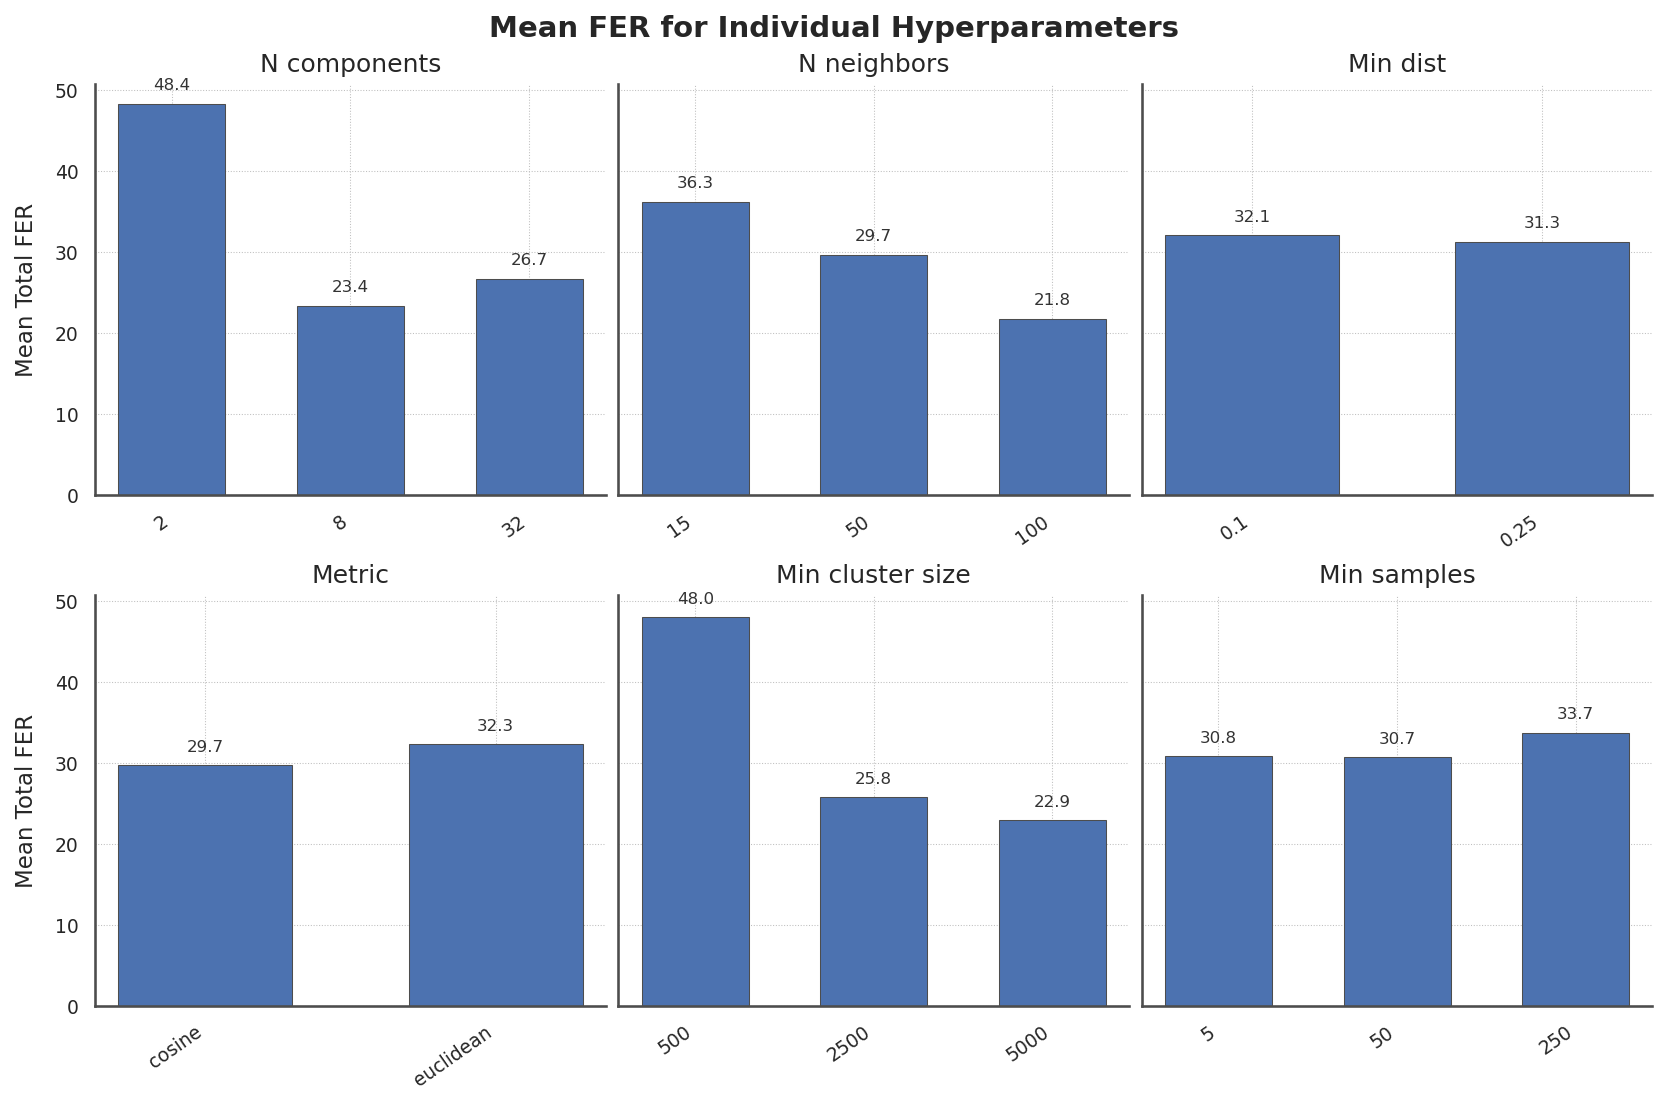

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- Configuration ---
CSV_PATH = Path("/home/george-vengrovski/Documents/projects/tweety_bert_paper/adaptive_search_V4_1M/adaptive_search_ALL_RESULTS_1000k.csv") # Ensure this path is correct
METRIC = "total_fer"
Y_AXIS_LABEL = "Mean Total FER"
# Updated PARAMS: removed "smoothing_window"
PARAMS = ["n_components", "n_neighbors", "min_dist", "metric",
          "min_cluster_size", "min_samples"]
OUTPUT_FIGURE_PATH = Path("./hyperparameter_analysis_plot_3x2.pdf") # Path to save the figure

# --- Matplotlib rcParams for Paper-Worthy Look ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": "Times New Roman",
    "font.size": 10,
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "figure.titlesize": 14,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.edgecolor": '0.3',
    "xtick.direction": "out",
    "ytick.direction": "out",
    "grid.color": "0.75",
    "grid.linestyle": ":",
    "grid.linewidth": 0.5,
    "figure.dpi": 150,
    "lines.markersize": 5,
    "xtick.major.pad": 2,
    "ytick.major.pad": 2,
    "axes.labelpad": 8,
})

# --- Data Loading and Processing ---
try:
    df = pd.read_csv(CSV_PATH)
except FileNotFoundError:
    print(f"Error: The file {CSV_PATH} was not found. Please check the path.")
    print("Using dummy data for demonstration.")
    n_rows_dummy = 100
    data = {}
    np.random.seed(0) # For reproducible dummy data
    # Define dummy data generation for the relevant PARAMS
    param_dummy_configs = {
        "n_components": [2, 8, 32],
        "n_neighbors": [15, 50, 100],
        "min_dist": [0.1, 0.25, 0.5],
        "metric": ['cosine', 'euclidean', 'manhattan'],
        "min_cluster_size": [500, 2500, 5000],
        "min_samples": [5, 50, 250],
        # "smoothing_window": [0, 100, 200] # Removed
    }
    for param in PARAMS: # Iterate through the updated PARAMS list
        if param in param_dummy_configs:
            if isinstance(param_dummy_configs[param][0], str): # Check if categorical
                 data[param] = np.random.choice(param_dummy_configs[param], size=n_rows_dummy)
            else:
                 data[param] = np.random.choice(param_dummy_configs[param], size=n_rows_dummy)
        else: # Fallback for any other params not explicitly defined (should not happen with current PARAMS)
            data[param] = np.random.randint(1, 5, size=n_rows_dummy)

    data[METRIC] = np.random.uniform(10, 50, size=n_rows_dummy)
    df = pd.DataFrame(data)
    nan_indices = np.random.choice(df.index, size=int(n_rows_dummy * 0.1), replace=False)
    df.loc[nan_indices, METRIC] = np.nan

df = df.loc[df[METRIC].notna()]

if df.empty:
    print(f"DataFrame is empty after filtering NaNs in '{METRIC}'. Cannot generate plot.")
else:
    means = {}
    for p in PARAMS:
        try:
            if p != 'metric': # Attempt to convert to numeric if column is not 'metric'
              df[p] = pd.to_numeric(df[p])
        except ValueError:
            pass # Keep as string if conversion fails
        
        grouped_means = df.groupby(p)[METRIC].mean()
        
        # Smart sorting based on data type of index
        if pd.api.types.is_numeric_dtype(grouped_means.index):
            means[p] = grouped_means.sort_index()
        else: # For categorical data like 'metric'
            means[p] = grouped_means.sort_values()

    # --- Plotting ---
    n_cols = 3
    n_rows = 2 # Updated for 3x2 grid
    
    fig, axes = plt.subplots(n_rows, n_cols,
                             figsize=(11, 7), # Adjusted figsize for 3x2
                             sharey=True,
                             constrained_layout=True)
    
    # Ensure axes is always a 2D array for consistent indexing, even if n_rows or n_cols is 1
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)


    fig.suptitle("Mean FER for Individual Hyperparameters", fontweight="bold", y=1.03)

    bar_color = "#4C72B0"
    bar_w = 0.60 

    for i, param_name in enumerate(PARAMS): # Iterate through the updated PARAMS list
        if param_name not in means:
            # This case should ideally not be hit if PARAMS are columns in df
            # If it is, we need to handle how axes are deleted or skipped
            r, c = divmod(i, n_cols)
            if r < n_rows and c < n_cols: # Check bounds before trying to delete
                 fig.delaxes(axes[r,c])
            continue

        ser = means[param_name]
        r, c = divmod(i, n_cols)
        ax = axes[r, c]

        xs = np.arange(len(ser))
        bars = ax.bar(xs, ser.values, width=bar_w, color=bar_color, 
                      edgecolor='0.3', linewidth=0.5)

        max_val_in_plot = df[METRIC].max() 
        label_offset = max_val_in_plot * 0.015

        for x_pos, y_val in zip(xs, ser.values):
            ax.text(x_pos, y_val + label_offset, f"{y_val:.1f}",
                    ha="center", va="bottom", fontsize=8, color='0.2')

        ax.set_title(param_name.replace('_', ' ').capitalize())
        ax.set_xticks(xs)
        ax.set_xticklabels([str(v) for v in ser.index], rotation=35, ha="right")
        
        if c == 0: # Y-axis label only for the first column
            ax.set_ylabel(Y_AXIS_LABEL)
        
        ax.yaxis.grid(True, linestyle=':', color='0.75', linewidth=0.5)
        ax.set_axisbelow(True)

    # Hide any unused axes if len(PARAMS) < n_rows * n_cols
    # Since PARAMS now has 6 elements and grid is 3x2 (6 plots), this loop won't run.
    # It's good practice to keep it for flexibility if PARAMS count changes.
    for j in range(len(PARAMS), n_rows * n_cols):
        r, c = divmod(j, n_cols)
        if r < n_rows and c < n_cols: # Check bounds
            fig.delaxes(axes[r,c])


    try:
        plt.savefig(OUTPUT_FIGURE_PATH, bbox_inches='tight')
        print(f"Figure saved to {OUTPUT_FIGURE_PATH}")
    except Exception as e:
        print(f"Error saving figure: {e}")
    
    plt.show()


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

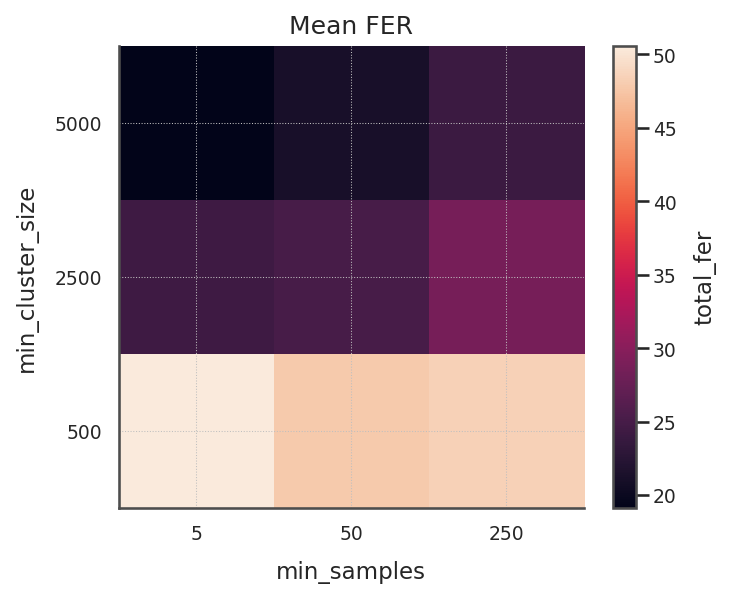

In [17]:

pivot = df.pivot_table(metric,
                       index='min_cluster_size',
                       columns='min_samples',
                       aggfunc='mean')
plt.figure(figsize=(5,4))
im = plt.imshow(pivot.values, origin='lower', aspect='auto')
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.xlabel('min_samples')
plt.ylabel('min_cluster_size')
plt.title('Mean FER')
plt.colorbar(im, label=metric)
plt.show()
